# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

## Optativa: Series de Tiempo en Finanzas

### Examen de Materia Completa - Actividades de clase

Grupo B08: _Emanuel Nicolás Herrador_

---


## 1. Índice (TODO)


- [2. Desarrollo previo](#2-desarrollo-previo)
- [3. Actividad 1: Visualización de series](#3-actividad-1-visualización-de-series)
  - [3.1. SPY - High](#31-spy---high)
  - [3.2. EUR/USD - Adjusted Close](#32-eurusd---adjusted-close)
  - [3.3. VIX - Open](#33-vix---open)
- [4. Actividad 2: Test de Dickey Fuller augmentado](#4-actividad-2-test-de-dickey-fuller-augmentado)
  - [4.1. Test a series originales](#41-test-a-series-originales)
    - [4.1.1. GBP/USD - Adjusted Close](#411-gbpusd---adjusted-close)
    - [4.1.2. SPY - Adjusted Close](#412-spy---adjusted-close)
    - [4.1.3. EUR/USD - Adjusted Close](#413-eurusd---adjusted-close)
    - [4.1.4. VIX - Adjusted Close](#414-vix---adjusted-close)
  - [4.2. Test a series diferenciadas](#42-test-a-series-diferenciadas)
    - [4.2.1. SPY - Adjusted Close](#421-spy---adjusted-close)
    - [4.2.2. EUR/USD - Adjusted Close](#422-eurusd---adjusted-close)
  - [4.3. Otras transformaciones](#43-otras-transformaciones)
- [5. Actividad 3: Generación de datos ARMA](#5-actividad-3-generación-de-datos-arma)
  - [5.1. Modelo MA(1)](#51-modelo-ma1)
  - [5.2. Modelo AR(1)](#52-modelo-ar1)
  - [5.3. Modelo ARMA(p, q)](#53-modelo-armap-q)
  - [5.4. Ajuste y predicción](#54-ajuste-y-predicción)
    - [5.4.1. De un modelo ARMA(1, 1) generado](#541-de-un-modelo-arma1-1-generado)
    - [5.4.2. De SPY - Adjusted Close](#542-de-spy---adjusted-close)
    - [5.4.3. De AAPL - Adjusted Close](#543-de-aapl---adjusted-close)

## 2. Desarrollo previo


En esta sección nos encargaremos de la importación de las librerías y consideraremos la función `tsplot` para plotear la serie y las funciones ACF y PACF.


In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh', title='Time Series Analysis Plots'):
    '''Esta función muestra el gráfico de la serie y de las funciones ACF y PACF.'''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        # mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_ylabel(r'$y_t$')
        ts_ax.set_xlabel(r'$t$')
        ts_ax.set_title(title)
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## 3. Actividad 1: Visualización de series


En la presente actividad, el objetivo es considerar tres series temporales distintas y analizar, para cada una de ellas, sus gráficos:

- Para `SPY` (fondo cotizado en bolsa), el máximo alcanzado por día
- Para `EURUSD` (tipo de cambio EUR/USD), el cierre ajustado por día
- Para `VIX` (índice de volatilidad del mercado de opciones PUT de Chicago), el valor de apertura por día

Con esto en mente, veamos cada uno de ellos.


### 3.1. SPY - High


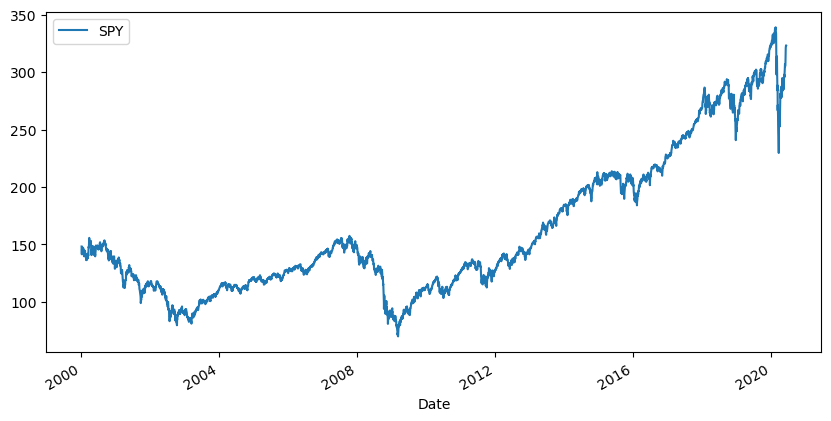

In [3]:
spy = pd.read_csv('./data/SPY.csv', index_col='Date', parse_dates=True)
spy['High'].plot(figsize=(10, 5), label='SPY')
plt.legend(loc='upper left')
plt.show()

`SPY - High` tiene claramente una tendencia ascendente marcada desde 2009 en adelante. Se observa esta particularidad, pese al gran valle de los precios a finales de 2019 e inicios del 2020.


### 3.2. EUR/USD - Adjusted Close


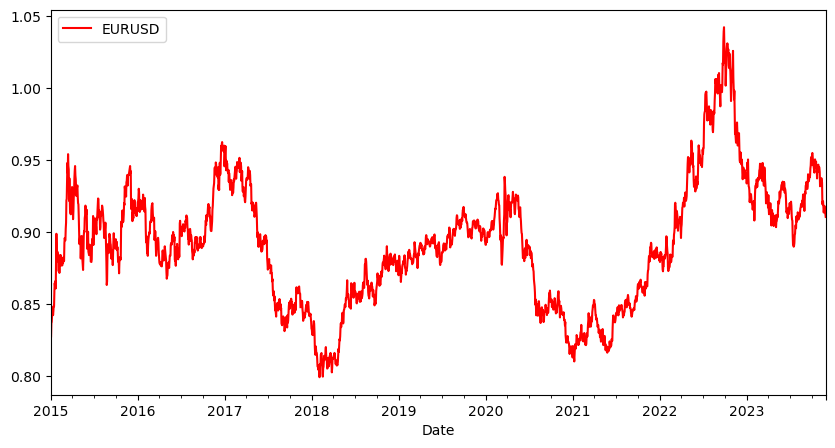

In [4]:
eurusd = pd.read_csv('./data/EURUSD.csv', index_col='Date', parse_dates=True)
eurusd['Adj Close'].plot(figsize=(10, 5), label='EURUSD', color='red')
plt.legend(loc='upper left')
plt.show()

`EURUSD - Adj Close` no presenta una tendencia marcada a lo largo de toda la serie, sino que en diversos momentos se ha visto tanto de forma ascendente como descendente o nula. Por ello mismo, si nos concentramos en el último período, podemos notar la gran tendencia ascendente 2021-2023, con una gran baja en 2023 que luego se convierte en tendencia nula aparentemente.

Esto puede suceder dado que ambas monedas son fuertes, por lo que se trata de mantener dentro de todo estable en el rango 0.8 - 1 de cambio.


### 3.3. VIX - Open


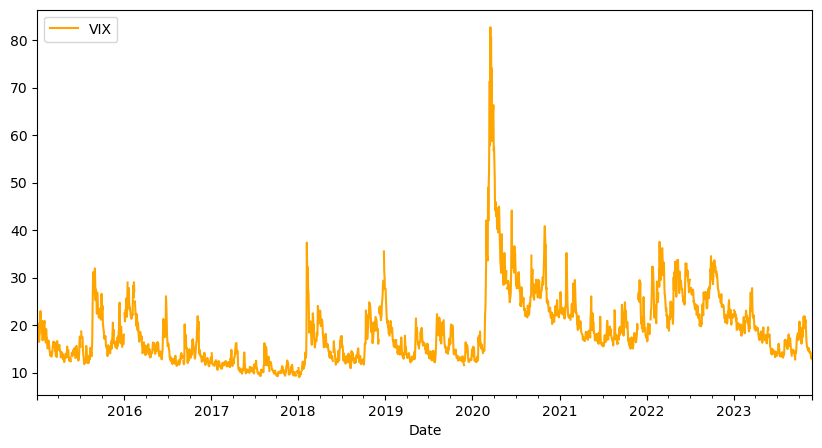

In [5]:
vix = pd.read_csv('./data/VIX.csv', index_col='Date', parse_dates=True)
vix['Open'].plot(figsize=(10, 5), label='VIX', color='orange')
plt.legend(loc='upper left')
plt.show()

Y, por último, `VIX - Open` demuestra claramente que es un índice de volatilidad por la característica de los picos tan marcados. Si obviamos la enorme volatilidad mostrada en 2020, podemos observar una tendencia moderada o casi nula a lo largo de toda la serie temporal. Si consideramos el momento posterior al pico, se puede notar que entonces la tendencia es descendiente volviendo al mismo "ritmo" en el que la serie se encontraba anteriormente (e incluso en el mismo nivel).


## 4. Actividad 2: Test de Dickey Fuller augmentado


En esta actividad se aplicará el test ADF para testear estacionariedad.
En primer lugar graficaremos la serie de tipo de cambio GBP/USD en el archivo "GBPUSD.csv", correspondiente al período 2009-2014.

¿Tendría argumentos para decir que esta serie sigue un patrón de una serie no estacionaria?


<Axes: xlabel='Date'>

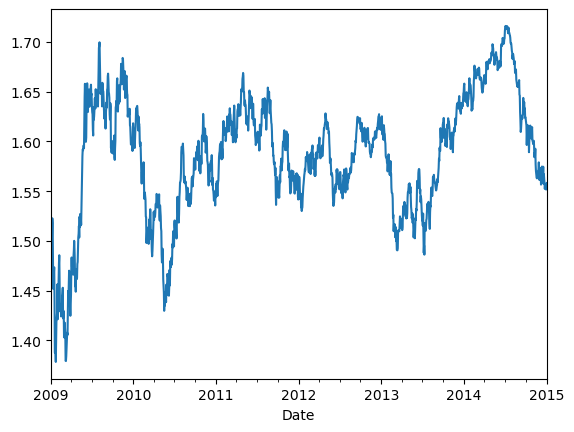

In [6]:
gbpusd = pd.read_csv('./data/GBPUSD.csv', index_col='Date', parse_dates=True)
gbpusd["Close"].plot()

### 4.1. Test a series originales


Para tener mayor seguridad y posteriormete poder realizar mejores predicciones, aplicaremos el test de Dickey Fuller.

1. Importe la función adfuller() desde statsmodels.
2. Corra la función adfuller() a la columna "Adj Close" del data frame de la serie.
3. Imprima:
   - el valor del estadístico
   - el p-valor
   - los valores críticos.


#### 4.1.1. GBP/USD - Adjusted Close


In [7]:
# Importar ADF
from statsmodels.tsa.stattools import adfuller

# Correr el test
result = adfuller(gbpusd["Adj Close"].dropna())

# Imprimir el valor del estadístico.
print(f'ADF Statistic: {result[0]}')

# Imprimir el p-valor
print(f'ADF p-value {result[1]}')

# Imprimir los valores críticos.
print(f'ADF - Critic values: {result[4]}')

ADF Statistic: -3.1577520416327
ADF p-value 0.02256413927291683
ADF - Critic values: {'1%': -3.4345407051300514, '5%': -2.863390943879109, '10%': -2.567755410866859}


Luego, como tenemos que el p-valor del test de ADF es igual a $0.023$, podemos rechazar la hipótesis de que la serie del tipo cambiario `GBP/USD` sea no estacionaria. Por ello mismo, podemos suponer que _sí es estacionaria_ la serie temporal.


#### 4.1.2. SPY - Adjusted Close


Aplicaremos ahora el test ADF a cada una de las series visualizadas en la Actividad 1: SPY, EURUSD y VIX, esta vez para la columna de precios ajustados "Adj Close". ¿Qué conclusiones obtiene?


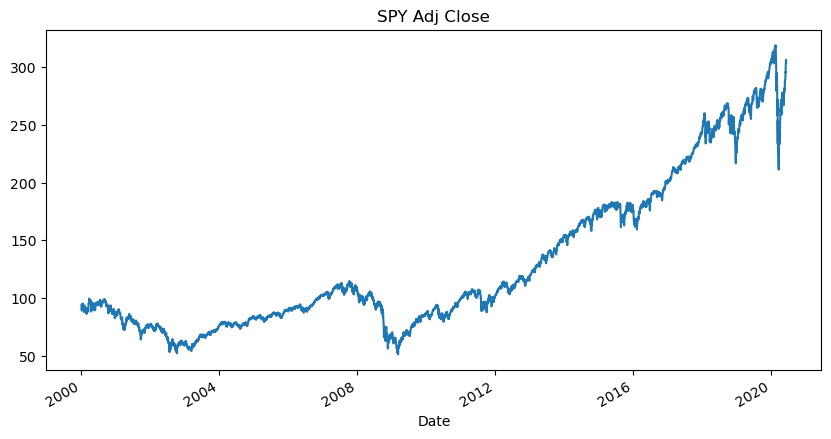

ADF Statistic: 1.2888483365045371
ADF p-value 0.9965457612912608
ADF - Critic values: {'1%': -3.4316295982872163, '5%': -2.862105446825125, '10%': -2.5670709875579742}


In [8]:
# Agrego: Plotear la serie temporal para comparar
spy["Adj Close"].plot(title="SPY Adj Close", figsize=(10, 5))
plt.show()

# Correr el test para SPY
result = adfuller(spy['Adj Close'].dropna())

# Imprimir el valor del estadístico.
print(f'ADF Statistic: {result[0]}')

# Imprimir el p-valor
print(f'ADF p-value {result[1]}')

# Imprimir los valores críticos.
print(f'ADF - Critic values: {result[4]}')

Como el p-valor es $0.997$, claramente no podemos rechazar la hipótesis, por lo que podemos afirmar que la serie temporal sigue un patrón de serie no estacionaria (lo cual tiene todo el sentido según el comportamiento visto en el gráfico y la clara tendencia existente).


#### 4.1.3. EUR/USD - Adjusted Close


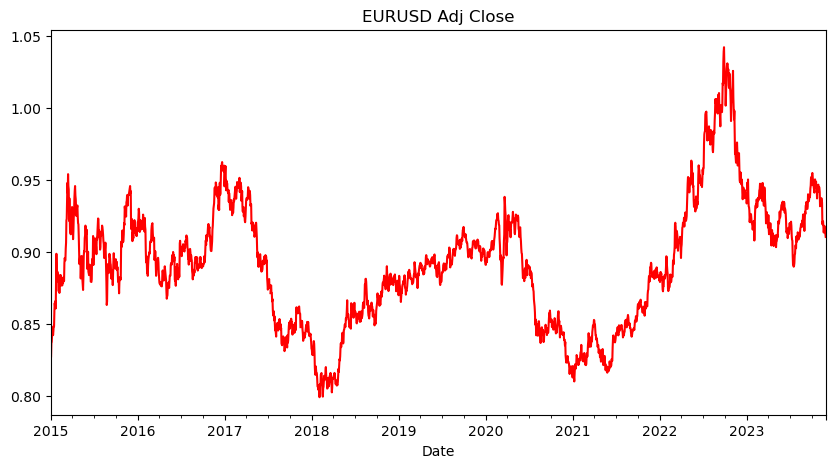

ADF Statistic: -2.4901260724050016
ADF p-value 0.11789527937682498
ADF - Critic values: {'1%': -3.433177890191643, '5%': -2.8627893029861404, '10%': -2.567435059780099}


In [9]:
# Agrego: Plotear la serie temporal para comparar
eurusd["Adj Close"].plot(title="EURUSD Adj Close",
                         figsize=(10, 5), color='red')
plt.show()

# Correr el test para EURUSD
result = adfuller(eurusd['Adj Close'].dropna())

# Imprimir el valor del estadístico.
print(f'ADF Statistic: {result[0]}')

# Imprimir el p-valor
print(f'ADF p-value {result[1]}')

# Imprimir los valores críticos.
print(f'ADF - Critic values: {result[4]}')

Por ello, como el p-valor es $0.1179$ y claramente este es mayor a $0.05$ (si consideramos un nivel de significancia del 95%), entonces no se rechaza el test de Dickey Fuller Aumentado, por lo que la serie sigue un patrón no estacionario.


#### 4.1.4. VIX - Adjusted Close


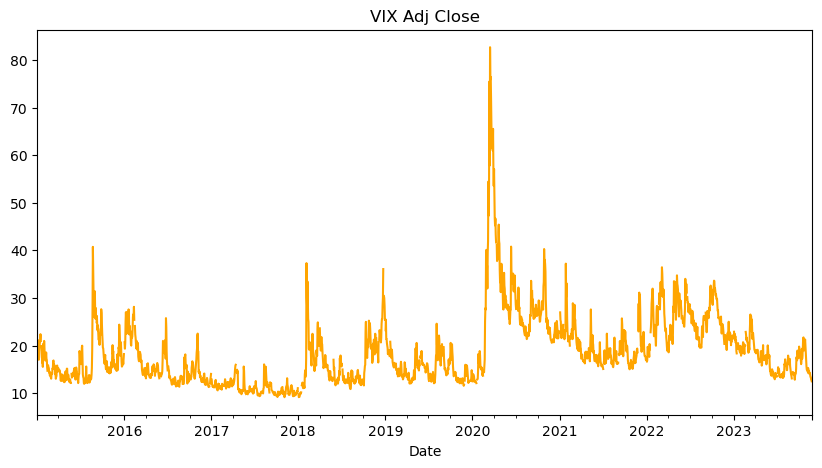

ADF Statistic: -4.953587256616708
ADF p-value 2.7398494440235856e-05
ADF - Critic values: {'1%': -3.4332831704990503, '5%': -2.862835790766408, '10%': -2.5674598111615343}


In [10]:
# Agrego: Plotear la serie temporal para comparar
vix["Adj Close"].plot(title="VIX Adj Close", figsize=(10, 5), color='orange')
plt.show()

# Correr el test para VIX
result = adfuller(vix['Adj Close'].dropna())

# Imprimir el valor del estadístico.
print(f'ADF Statistic: {result[0]}')

# Imprimir el p-valor
print(f'ADF p-value {result[1]}')

# Imprimir los valores críticos.
print(f'ADF - Critic values: {result[4]}')

Luego, como el p-valor obtenido es del orden de $10^{-5}$, entonces podemos rechazar con total seguridad la hipótesis de que la serie no es estacionaria. Por ello mismo, tenemos que el valor de cierre ajustado para el índice VIX sigue un patrón estacionario (tal y como se mencionó en la actividad 1 por la forma del gráfico, si exceptuamos el gran pico que se dio en 2020).


### 4.2. Test a series diferenciadas


Para aquellas series que tienen evidencia de "no ser estacionarias", aplicaremos la primera diferencia, eliminando los valores NaN. Asignar esta serie diferenciada a "nombre de serie"\_diff y volver a correr el test.

_Aclaración:_ El enunciado del ejercicio decía que era para las series que **no** tienen evidencia de "no ser estacionarias". Es decir, para aquellas en las que la hipótesis nula se rechazó y, por ende, son consideradas estacionarias. Sin embargo, tiene mayor sentido realizar el test a las series diferenciadas no estacionarias, por lo que consideré aplicarlas a estas (SPY y EUR/USD).


#### 4.2.1. SPY - Adjusted Close


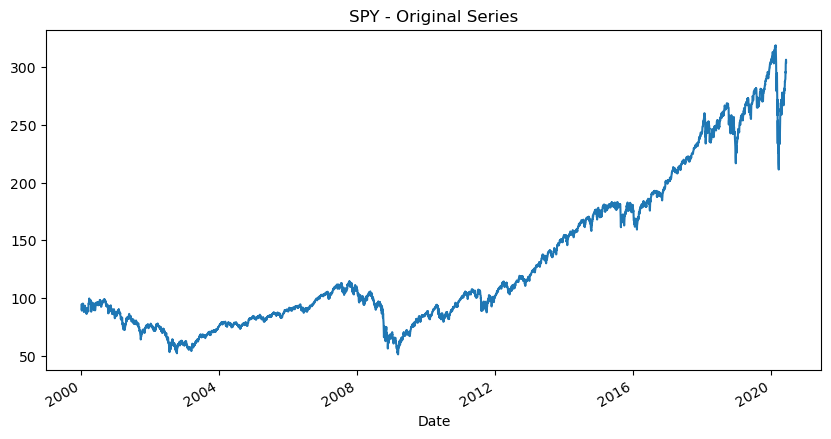

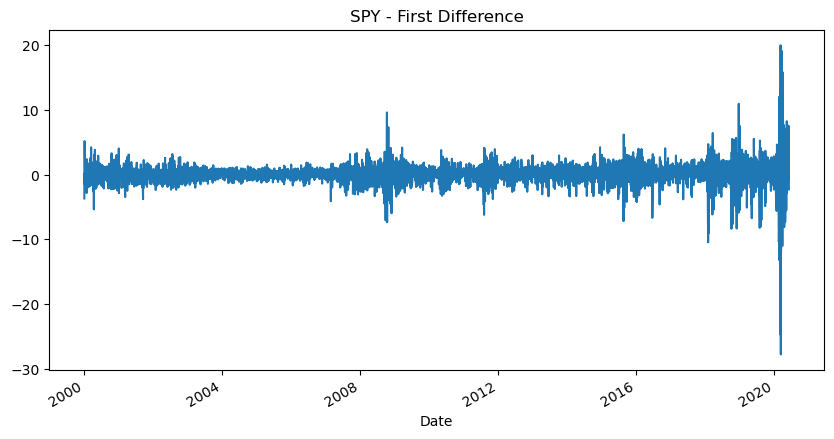

ADF Statistic: -14.68171775662503
ADF p-value 3.1484957159978453e-27


In [11]:
# Calcular la primera diferencia
spy_diff = spy.diff().dropna()

# Correr el test ADF a la serie diferenciada.
result = adfuller(spy_diff['Adj Close'])

# Graficar la serie diferenciada y la original
spy['Adj Close'].plot(figsize=(10, 5), title='SPY - Original Series')
plt.show()
spy_diff['Adj Close'].plot(figsize=(10, 5), title='SPY - First Difference')
plt.show()

# Imprimir el valor del estadístico y el p-valor de la serie diferenciada.
print(f'ADF Statistic: {result[0]}')
print(f'ADF p-value {result[1]}')

Gracias a lo cual notamos que la serie diferenciada es claramente estacionaria porque el test ADF se rechaza dado que el p-valor es casi nulo.


#### 4.2.2. EUR/USD - Adjusted Close


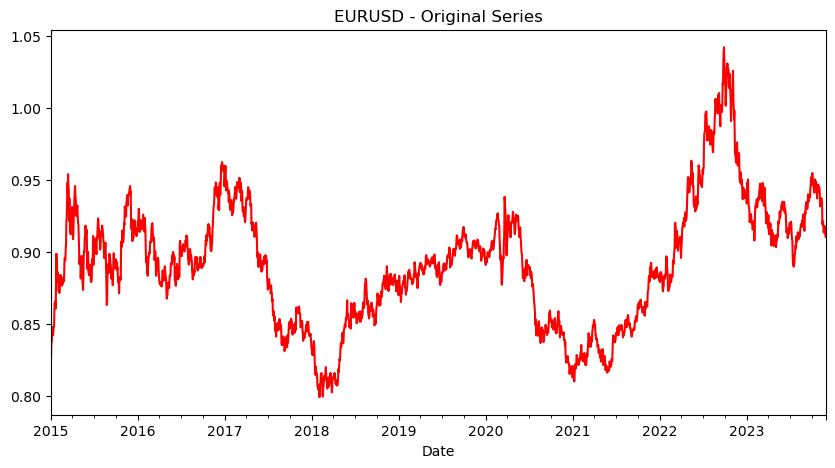

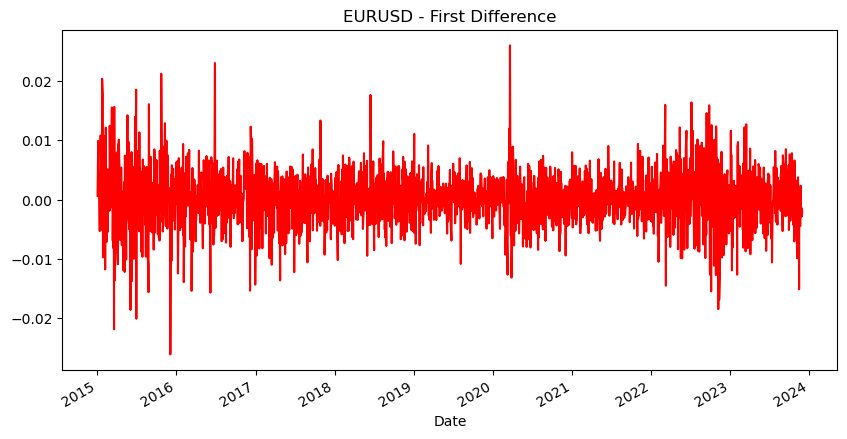

ADF Statistic: -21.112397106853358
ADF p-value 0.0


In [12]:
# Calcular la primera diferencia
eurusd_diff = eurusd.diff().dropna()

# Correr el test ADF a la serie diferenciada.
result = adfuller(eurusd_diff['Adj Close'])

# Graficar la serie diferenciada
eurusd['Adj Close'].plot(
    figsize=(10, 5), title='EURUSD - Original Series', color='red')
plt.show()
eurusd_diff['Adj Close'].plot(
    figsize=(10, 5), title='EURUSD - First Difference', color='red')
plt.show()

# Imprimir el valor del estadístico y el p-valor de la serie diferenciada.
print(f'ADF Statistic: {result[0]}')
print(f'ADF p-value {result[1]}')

Gracias a lo cual notamos que la serie diferenciada es claramente estacionaria porque el test ADF se rechaza dado que el p-valor es casi nulo.


### 4.3. Otras transformaciones


Una forma de transformar una serie de precios de acciones es tomando el log-retorno de los precios. Esto se calcula como:

$$\log\left(\frac{P_t}{P_{t-1}}\right)$$

Así por ejemplo, si se trata de la serie de 'AAPL.csv' utilizaremos las funciones:

$y_t$ <-- data_aapl

$y_{t-1}$ <--data_aapl.shift(1)

$log( )$ <-- np.log()

En el siguiente ejercicio le pedimos analizar la existencia de una raíz unitaria para la serie AAPL, y para las transformaciones de log-retorno y las diferencias de primer orden para la serie de AAPL.


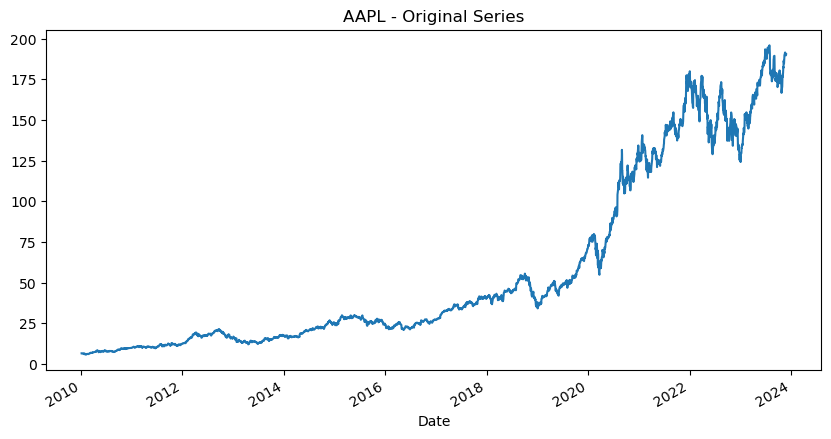

Estadístico 0.9205474043713685
p-valor 0.9933527012638801


In [13]:
# Aplicar el test ADF a la serie.
aapl = pd.read_csv('./data/AAPL.csv', index_col='Date', parse_dates=True)

# Graficar la serie
aapl['Adj Close'].plot(figsize=(10, 5), title='AAPL - Original Series')
plt.show()

# Correr el test ADF
result_aapl = adfuller(aapl['Adj Close'])
print('Estadístico', result_aapl[0])
print('p-valor', result_aapl[1])

Donde podemos notar que, claramente, la serie original es no estacionaria. En este caso, el test ADF **no se rechaza** dado que el p-valor es $0.99$. De igual modo, puede notarse esto por la gran tendencia ascendente que presenta.


Ahora, si calculamos la **primera diferencia** de la serie temporal para testear estacionariedad, tenemos:


Estadístico -13.547166948264024
p-valor 2.4488284478958126e-25


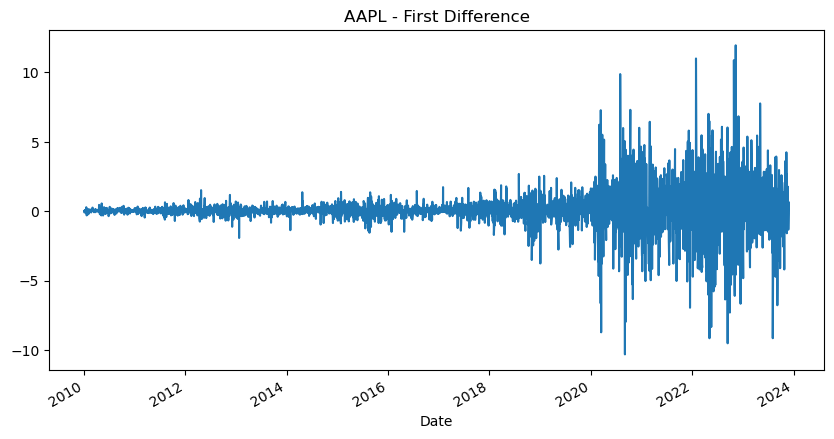

In [14]:
# Calcular la primera diferencia y eliminar los valores NaN.
aapl_diff = aapl.diff().dropna()

# Graficar la serie diferenciada
aapl_diff['Adj Close'].plot(figsize=(10, 5), title='AAPL - First Difference')

# Correr el test ADF e imprimir.
result_diff = adfuller(aapl_diff['Adj Close'])
print('Estadístico', result_diff[0])
print('p-valor', result_diff[1])

Donde podemos notar claramente que en el caso de la _serie diferenciada_ (1 vez), logramos obtener la estacionariedad deseada, dado que el p-valor es cercano a $0$ (lo que implica que se rechaza la hipótesis nula del test de ADF).


Ahora, si probamos con **otra transformación** como la de los **log-retornos**, obtenemos lo siguiente:


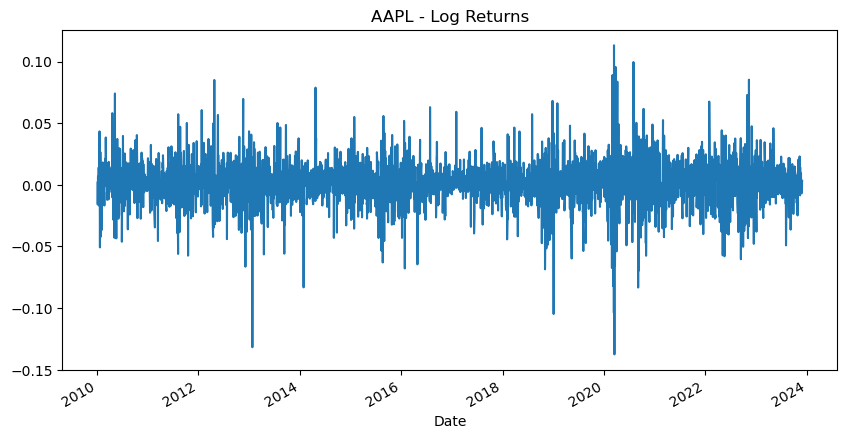

Estadístico -12.227077533036987
p-valor 1.0744211593095614e-22


In [15]:
# Calcular los log-retornos y eliminar los NaN.
aapl_log = np.log(aapl / aapl.shift(1)).dropna()

# Graficar los log-retornos
aapl_log['Adj Close'].plot(figsize=(10, 5), title='AAPL - Log Returns')
plt.show()

# Correr el test e imprimir.
result_log = adfuller(aapl_log['Adj Close'])
print('Estadístico', result_log[0])
print('p-valor', result_log[1])

Donde también podemos notar que se obtiene una serie estacionaria con esta transformación dado que se rechaza la hipótesis nula del test ADF, porque el p-valor es casi nulo.


## 5. Actividad 3: Generación de datos ARMA


En esta actividad generaremos datos correspondientes a un modelo AR, MA o ARMA.

Para ello es posible usar la función arma_generate_sample().

Recordar, para cualquier modelo ARMA(p,q):

- La lista de los coeficientes "ar" son de la forma $[1, -a_1, -a_2, ..., -a_p]$.
- La lista de los coeficientes "ma" son de la forma $[1, m_1, m_2, ..., m_q]$,
  donde los $a_i$ y $m_j$ son los coeficientes de los retardos $i$ de la parte AR y los retardos $j$ de la parte MA del modelo, respectivamente.


### 5.1. Modelo MA(1)


Construir un modelo MA(1) que responda a la fórmula:
$$ y_t = a_t - 0.7 a_{t-1}$$
Generar una serie de tiempo con 300 valores.


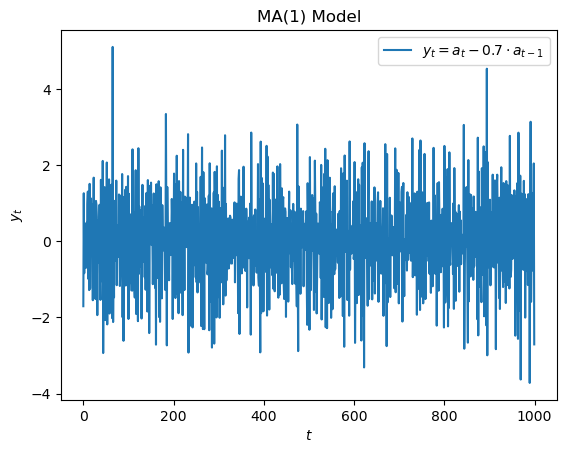

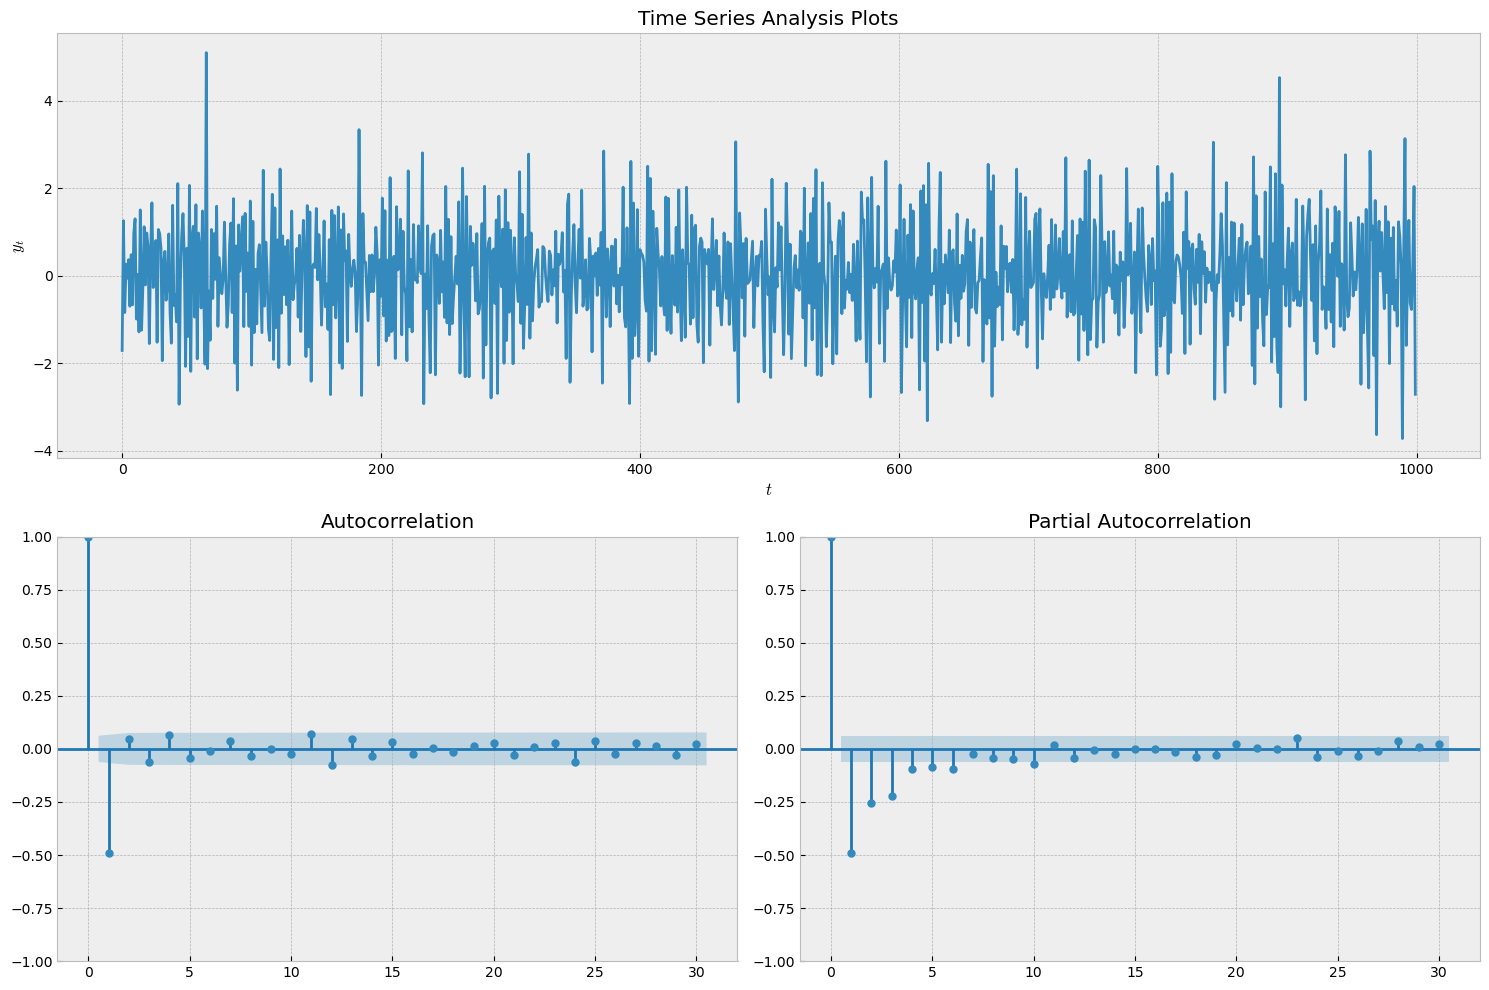

In [16]:
# Importar la función para generar la serie.
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Inicializar los coeficientes del modelo.
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generar la serie.
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=1000, burnin=500)

plt.plot(y, label=r'$y_t = a_t - 0.7\cdot a_{t-1}$')
plt.title('MA(1) Model')
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.legend()
plt.show()

tsplot(y, lags=30)

### 5.2. Modelo AR(1)


Repetir la actividad anterior para el modelo:
$y_t = -0.7y_{t-1} + \epsilon_t $.
Graficarlo.


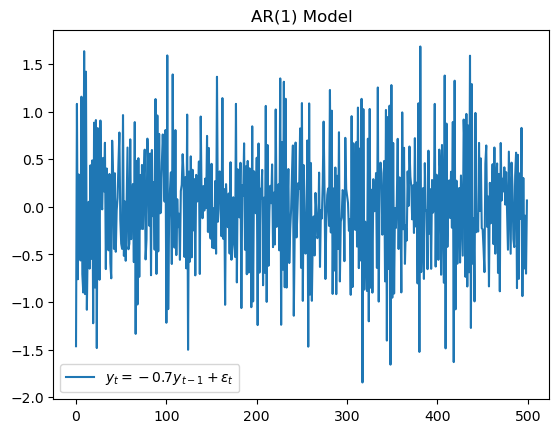

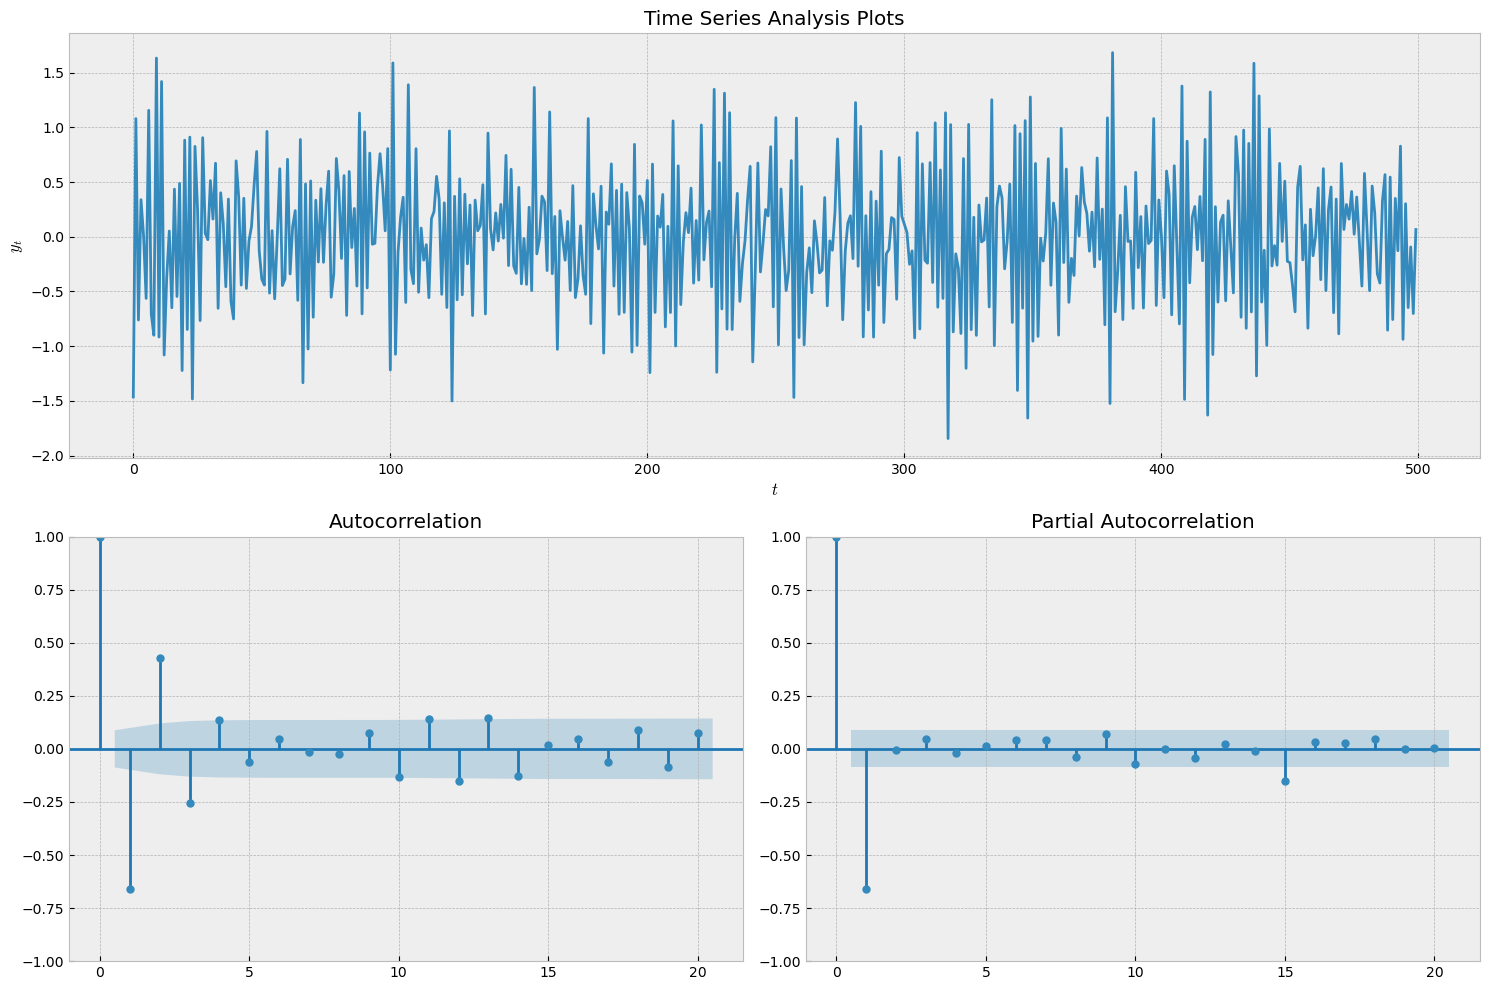

In [17]:
# Inicializar los coeficientes del modelo.
ar_coefs = [1, 0.7]
ma_coefs = [1]

# Generar la serie.
y = arma_generate_sample(
    ar_coefs, ma_coefs, nsample=500, scale=0.5, burnin=200)

plt.plot(y, label=r'$y_t = -0.7 y_{t-1} + \epsilon_t$')
plt.title('AR(1) Model')
plt.legend()
plt.show()

tsplot(y, lags=20)

### 5.3. Modelo ARMA(p, q)


Repetir la actividad anterior para el modelo:
$y_t = -0.2y_{t-1} + 0.3 a_t + 0.4 a_{t-1}$.
Graficarlo.


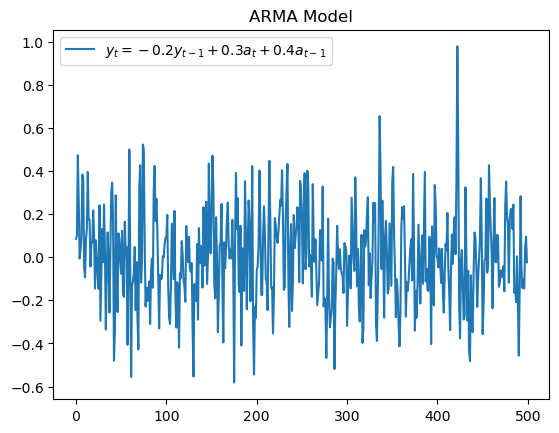

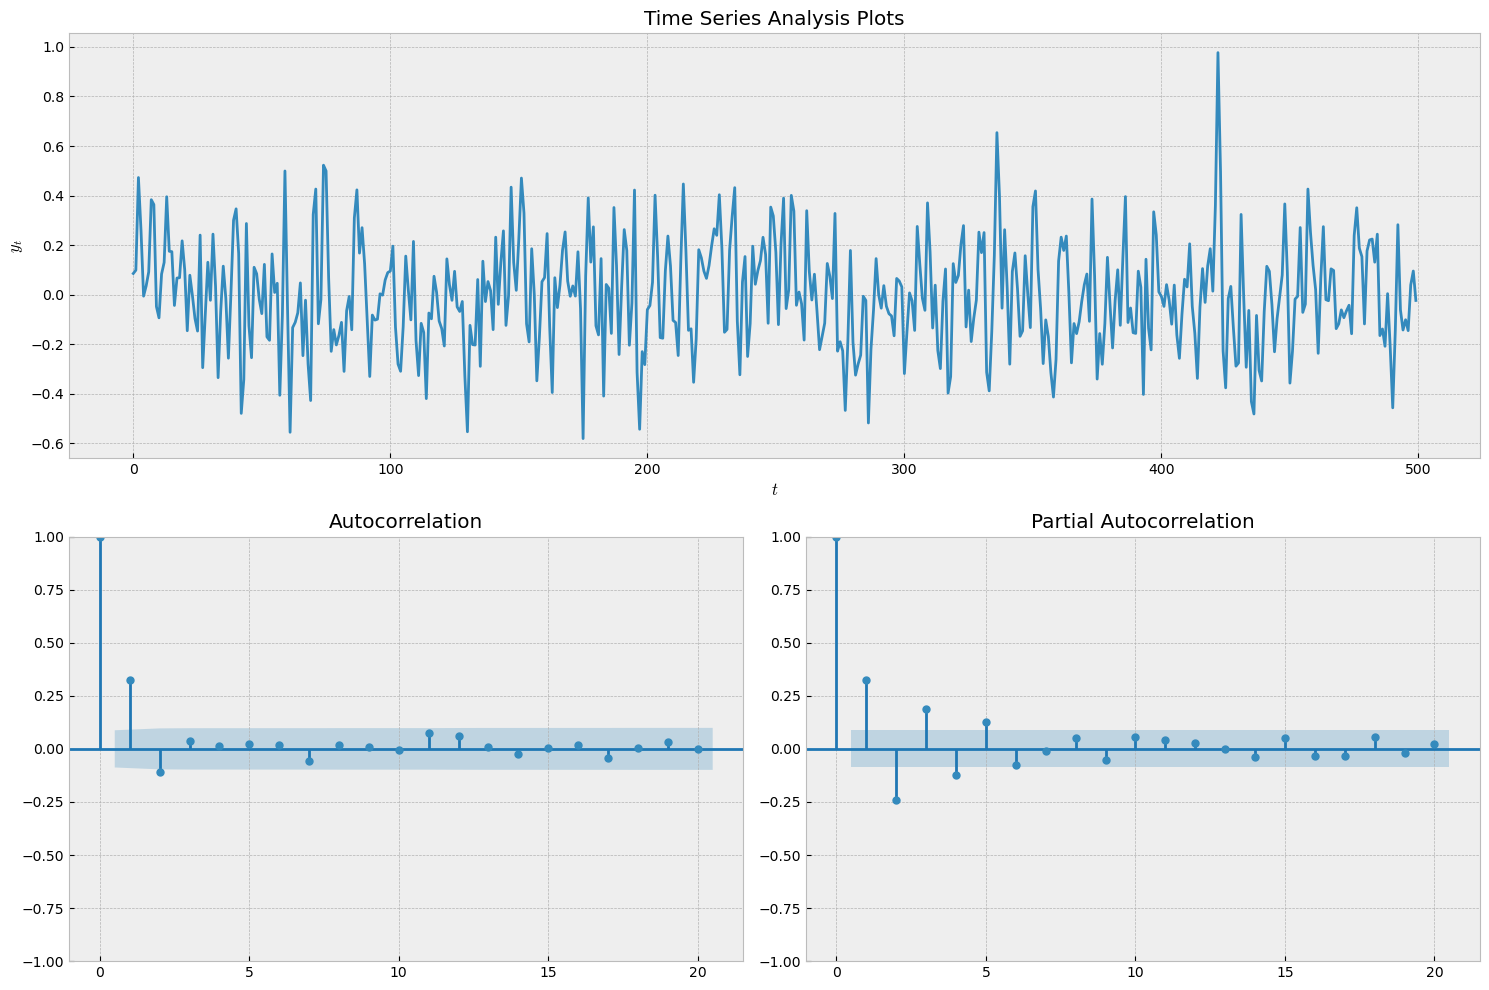

In [18]:
# Inicializar los coeficientes del modelo.
ar_coefs = [1, 0.2]
ma_coefs = [0.3, 0.4]

# Generar la serie.
y = arma_generate_sample(
    ar_coefs, ma_coefs, nsample=500, scale=0.5, burnin=200)

plt.plot(y, label=r'$y_t = -0.2 y_{t-1} + 0.3 a_t + 0.4 a_{t-1}$')
plt.title('ARMA Model')
plt.legend()
plt.show()

tsplot(y, lags=20)

### 5.4. Ajuste y predicción


#### 5.4.1. De un modelo ARMA(1, 1) generado

En las siguientes celdas crearemos un modelo ARIMA(1,0,1), y luego lo ajustaremos a este modelo.

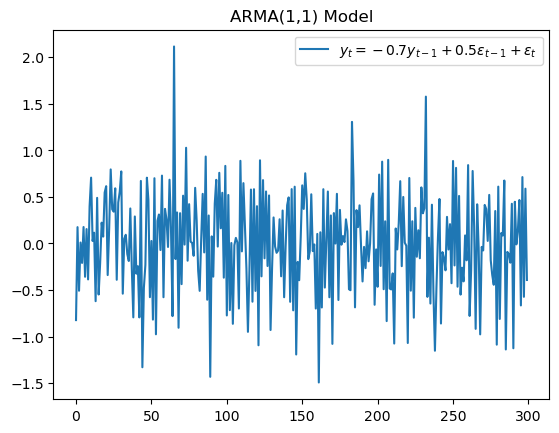

In [19]:
# Crear un ARMA(1,1)
np.random.seed(1)

# Inicializar los coeficientes del modelo.
ar_coefs = [1, 0.7]
ma_coefs = [1, 0.5]

# Generar la serie.
y = arma_generate_sample(
    ar_coefs, ma_coefs, nsample=300, scale=0.5, burnin=500)

# Damos estructura de pandas a la serie.
y = pd.DataFrame(y, columns=['Serie'])

# Graficamos la serie.
plt.plot(
    y['Serie'], label=r'$y_t = -0.7 y_{t-1} + 0.5 \epsilon_{t-1} + \epsilon_t$')
plt.title('ARMA(1,1) Model')
plt.legend()
plt.show()

En la siguiente celda, ajustaremos el modelo a un ARIMA(1,0,1).


In [20]:
# Importamos el modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Instanciamos el modelo
model = ARIMA(y, order=(1, 0, 1))

# Ajustamos el modelo
results = model.fit()

# Imprimimos el resumen estadístico
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Serie   No. Observations:                  300
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -220.252
Date:                Fri, 20 Sep 2024   AIC                            448.503
Time:                        18:26:42   BIC                            463.318
Sample:                             0   HQIC                           454.432
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.025     -0.144      0.886      -0.053       0.045
ar.L1         -0.7858      0.088     -8.884      0.000      -0.959      -0.612
ma.L1          0.5210      0.120      4.348      0.0

Y ahora analizaremos la predicción de nuestro modelo dentro y fuera de la muestra.


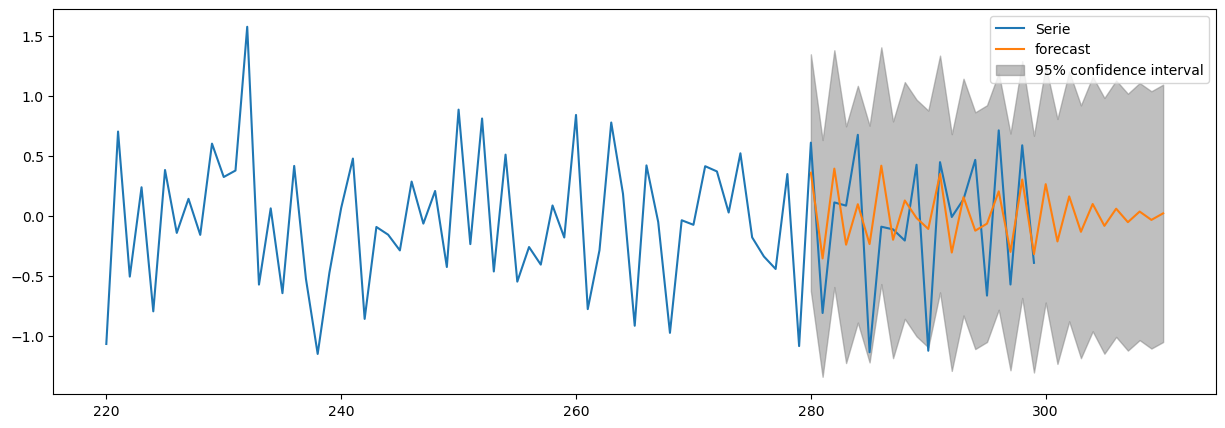

In [74]:
from statsmodels.graphics.tsaplots import plot_predict


fig, ax = plt.subplots(figsize=(15, 5))
y.iloc[220:300].plot(ax=ax)

plot_predict(results, 280, 310,  ax=ax)
plt.show()

Donde podemos notar que la predicción tiende a convertirse en una constante $0$ mientras más valores queramos predecir. Además, podemos notar que conserva el nivel de la serie estacionaria y es el valor al que quiere llegar con varianza nula.

#### 5.4.2. De SPY - Adjusted Close

In [23]:
spy_lrets = np.log(spy/spy.shift(1)).dropna()
model_fit = ARIMA(spy_lrets['Adj Close'], order=(1, 0, 1)).fit()
print(model_fit.summary())

c:\Users\emanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\emanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\emanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5140
Model:                 ARIMA(1, 0, 1)   Log Likelihood               15231.171
Date:                Fri, 20 Sep 2024   AIC                         -30454.341
Time:                        18:26:43   BIC                         -30428.162
Sample:                             0   HQIC                        -30445.178
                               - 5140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.359      0.174   -9.98e-05       0.001
ar.L1          0.1973      0.052      3.761      0.000       0.094       0.300
ma.L1         -0.2959      0.051     -5.839      0.0

Con ello, entonces, podemos realizar la predicción de los log-retornos y ver la correspondiente predicción en la serie original:

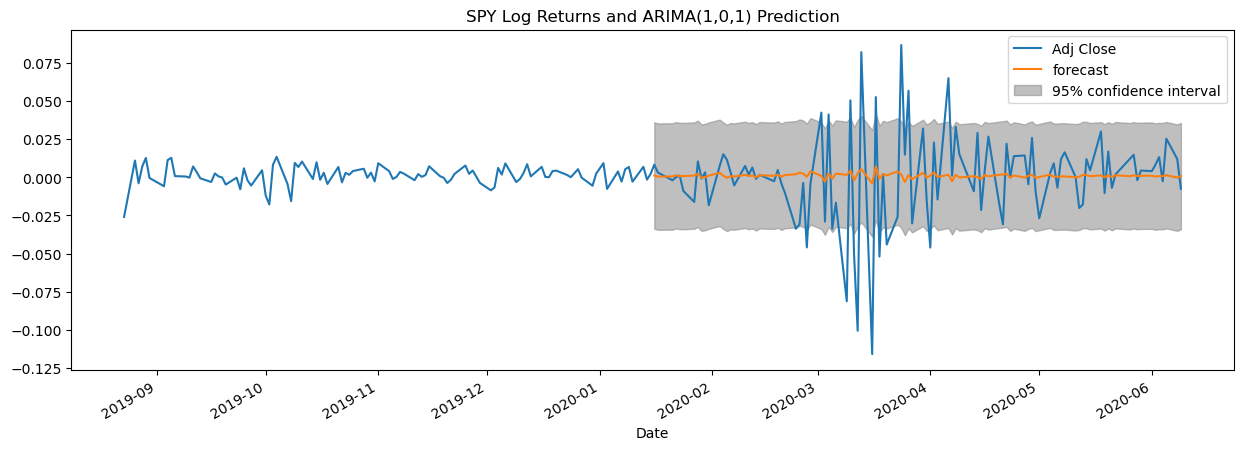

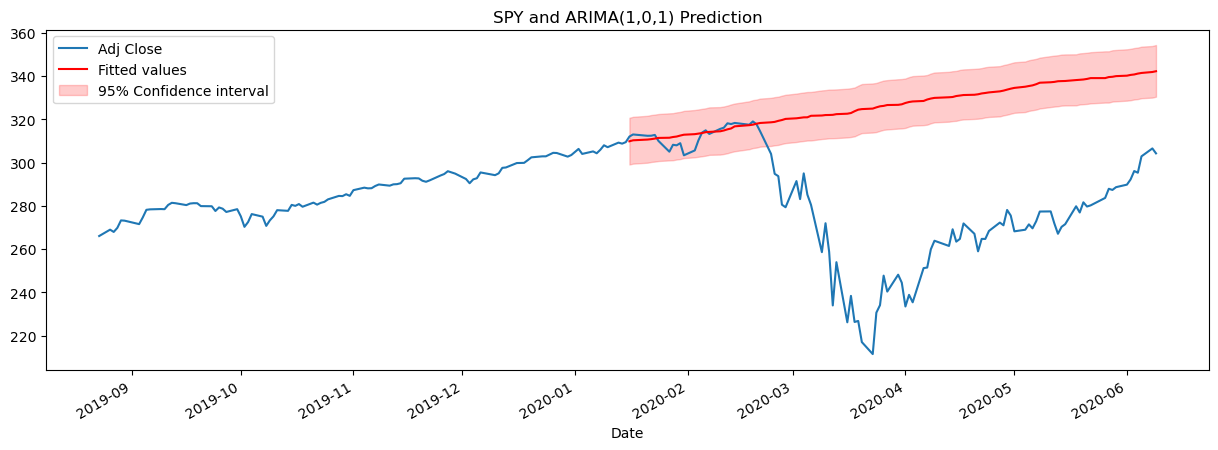

In [73]:
pred_len = 100

# Grafiar los log-retornos y la predicción
fig, ax = plt.subplots(figsize=(15, 5))

spy_lrets['Adj Close'].iloc[-2 * pred_len:].plot(ax=ax)
plot_predict(
    model_fit, start=spy_lrets.index[-pred_len], end=spy_lrets.index[-1], ax=ax)

plt.title('SPY Log Returns and ARIMA(1,0,1) Prediction')
plt.legend()
plt.show()

# Graficar la serie original y la predicción
fig, ax = plt.subplots(figsize=(15, 5))
spy['Adj Close'].iloc[-2 * pred_len:].plot(ax=ax)

val = np.exp(model_fit.fittedvalues.iloc[-pred_len:])
ant = spy['Adj Close'].iloc[-pred_len-1]
for i in range(pred_len):
    val.iloc[i] = val.iloc[i] * ant
    ant = val.iloc[i]
val.index = spy_lrets.index[-pred_len:]
plt.plot(val, label='Fitted values', color='red')

conf = np.exp(model_fit.get_forecast(steps=pred_len).conf_int())
conf.iloc[0] = conf.iloc[0] * spy['Adj Close'].iloc[-pred_len-1]
for i in range(1, pred_len):
    conf.iloc[i] = conf.iloc[i] * val.iloc[i-1]
conf.index = spy_lrets.index[-pred_len:]
plt.fill_between(conf.index, conf.iloc[:, 0],
                 conf.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence interval')

plt.title('SPY and ARIMA(1,0,1) Prediction')
plt.legend()
plt.show()

Gracias a lo cual notamos que la predicción le erra por mucho porque trata de seguir la tendencia ascendente existente (e incluso con baja varianza si descomponemos la serie). Por ello mismo, el pico ocurrido en Febrero del 2020 no logra predecirlo porque no era un valor esperado en base al comportamiento de los últimos precios de cierre ajustados de SPY.

#### 5.4.3. De AAPL - Adjusted Close

In [25]:
aapl_lrets = np.log(aapl/aapl.shift(1)).dropna()
model_fit = ARIMA(aapl_lrets['Adj Close'], order=(1, 0, 1)).fit()
print(model_fit.summary())

c:\Users\emanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\emanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\emanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3499
Model:                 ARIMA(1, 0, 1)   Log Likelihood                9131.366
Date:                Fri, 20 Sep 2024   AIC                         -18254.731
Time:                        18:26:44   BIC                         -18230.090
Sample:                             0   HQIC                        -18245.937
                               - 3499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      3.208      0.001       0.000       0.002
ar.L1         -0.0757      0.266     -0.285      0.776      -0.597       0.446
ma.L1          0.0327      0.269      0.122      0.9

Con ello, entonces, podemos realizar la predicción de los log-retornos y ver la correspondiente predicción en la serie original:

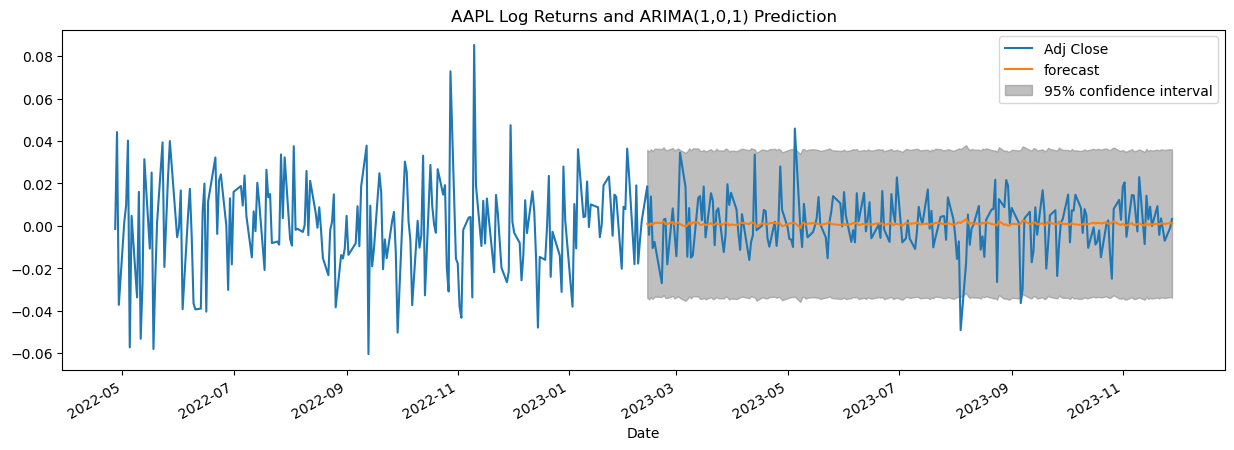

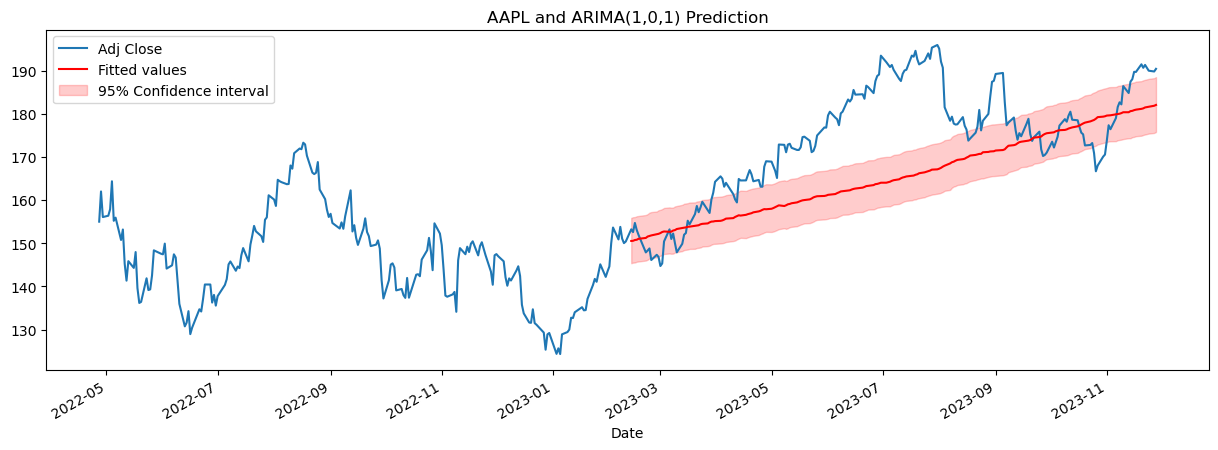

In [72]:
pred_len = 200

# Graficar los log-retornos y la predicción
fig, ax = plt.subplots(figsize=(15, 5))

aapl_lrets['Adj Close'].iloc[-2 * pred_len:].plot(ax=ax)

plot_predict(
    model_fit, start=aapl_lrets.index[-pred_len], end=aapl_lrets.index[-1], ax=ax)

plt.title('AAPL Log Returns and ARIMA(1,0,1) Prediction')
plt.legend()
plt.show()

# Graficar la serie original y la predicción
fig, ax = plt.subplots(figsize=(15, 5))
aapl['Adj Close'].iloc[-2 * pred_len:].plot(ax=ax)

val = np.exp(model_fit.fittedvalues.iloc[-pred_len:])
ant = aapl['Adj Close'].iloc[-pred_len-1]
for i in range(pred_len):
    val.iloc[i] = val.iloc[i] * ant
    ant = val.iloc[i]
val.index = aapl_lrets.index[-pred_len:]
plt.plot(val, label='Fitted values', color='red')

conf = np.exp(model_fit.get_forecast(steps=pred_len).conf_int())
conf.iloc[0] = conf.iloc[0] * aapl['Adj Close'].iloc[-pred_len-1]
for i in range(1, pred_len):
    conf.iloc[i] = conf.iloc[i] * val.iloc[i-1]
conf.index = aapl_lrets.index[-pred_len:]
plt.fill_between(conf.index, conf.iloc[:, 0],
                 conf.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence interval')

plt.title('AAPL and ARIMA(1,0,1) Prediction')
plt.legend()
plt.show()

Gracias a lo cual notamos que la predicción acierta en la tendencia y el valor al que llega la serie temporal, solo que no tiene en cuenta, obviamente, el pico de alza que aparece desde los meses 5 a 7 del 2023. Sin embargo, la predicción tiene en cuenta la tendencia actual de la serie y logra llegar, el rango de confianza, a los valores esperados a finales de año del 2023.